# lo que aprenderas 
- este ejercicio solo es una repeticion de los 2 anteriores pero...
- en este colab explico de forma mas amplia cosas que antes no indague (ya que intente hacer este colab primero):
  - la sintaxis para descargar datasets desde una pagina de descarga
  - la sintaxis de la compresion del bucle for
- aprenderemos a usar mas ampliamente el ImageDataGenerator para hacer ampliacion del dataset : 

```
from keras_preprocessing.image import ImageDataGenerator
# aumentar el tamaño de la data 
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)
TRAINING_DIR = "/tmp/rps/"
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)
```



##### Copyright 2019 The TensorFlow Authors.
original name of the file 
Course 2 - Part 8 - Lesson 2 - Notebook (RockPaperScissors).ipynb

# puedes descargar datos sobre la maquina que te presta colab a 190mb/s
algo sorprendente sobre usar colab es que ademas de que te prestan una maquina poderosa, tambien te prestan una infraestructura de internet superpoderosa, que te permite descargar datos pesados en cuestion de segundos. la razon es que si quieres necesitas utilizar un dataset en tu modelo a entrenar, y el dataset puede ser descargado desde un link, no es necesario tenerlo en tu drive o en tu computadora, ya que cada vez que utilices el codigo lo puedes descargar en la maquina que te presta colab y como la descarga es ultra rapida, no habra problema. esto realmente es la computacion en la nube.    
/tmp/rps.zip        100%[===================>] 191.38M   190MB/s    in 1.0s  

# como descargar archivos de un link 

https://www.delftstack.com/es/howto/linux/how-to-use-wget-command-in-linux/
how to use wet 
Podemos usar el comando wget en Linux para descargar archivos de Internet usando los protocolos HTTP, HTTPS y FTP con varias opciones como descargar múltiples archivos a la vez, descargar en segundo plano, limitar el ancho de banda, y mucho más.      
cada vez que quieres usar un comando de la consola y no de python especificaremos el comando con el simbolo "!" seguida del comando. 
el comando wet sirve para descargar ficheros dando un link. 


```
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
```
- "!": especifica que colocaremso un comando a la consola 
- "wget": comando de descarga 
- --no-check-certificate: 
- "/": se usa para usar un salto de linea sin perjudicar la sintaxis corrida del comando
- " https://storage...": link de descarga directa 
- "-O /tmp/rps.zip": el parametro -o Gsirve para guardar el archivo descargado usando wget con un nombre de archivo personalizado


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-01-26 18:58:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  34.1MB/s    in 5.6s    

2022-01-26 18:58:55 (34.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-01-26 18:58:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

# 1 descargada y preparacion del dataset 
las siguientes 2 celdas son para cargar y descomprimir el dataset

In [ ]:
import os
import zipfile

#utilizamos la libreria zipfile para  
local_zip = '/tmp/rps.zip'
# abrir el archivo zip
zip_ref = zipfile.ZipFile(local_zip, 'r')
# lo extraemos y cerramos 
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

https://www.geeksforgeeks.org/python-os-path-join-method/#:~:text=os.-,path.,except%20the%20last%20path%20component.

os.path.join() method in Python join one or more path components intelligently. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component.



```
# importing os module
import os
# Path
path = "/home"
# Join various path components
print(os.path.join(path, "User/Desktop", "file.txt"))

Output: 
/home/User/Desktop/file.txt

os.listdir("/")  #regresa una lista con las carpetas o nombre de los archivos del directorio 
```



# 2 curacion de datos 
las 2 siguientes celdas de codigo son para la curacion de datos y entender el dataset. 

In [ ]:
# guardamos el directorio de cada categoria en una variable (no era necesario el comando os)
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')
print(type(scissors_dir))

# imprimimos el tamaño del dataset 
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

# guardamos los nombres de todos los archivos en una lista
rock_files = os.listdir(rock_dir)
# visualizamos el nombre de 10 archivos
# la sintaxis de abajo es de un rango 0-10 = list[0:10] = list[:10]
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

<class 'str'>
total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-029.png', 'rock01-039.png', 'rock01-019.png', 'rock05ck01-115.png', 'rock03-077.png', 'rock06ck02-041.png', 'rock03-067.png', 'rock06ck02-097.png', 'rock02-118.png', 'rock07-k03-090.png']
['paper07-003.png', 'paper03-007.png', 'paper01-021.png', 'paper02-032.png', 'paper03-118.png', 'paper02-112.png', 'paper07-118.png', 'paper07-013.png', 'paper06-113.png', 'paper01-046.png']
['testscissors02-076.png', 'scissors01-028.png', 'scissors04-032.png', 'testscissors02-071.png', 'testscissors01-062.png', 'scissors01-078.png', 'testscissors02-003.png', 'testscissors01-015.png', 'scissors01-061.png', 'testscissors03-044.png']


## forma corta de definir un loop for 
https://www.w3schools.com/python/python_lists_loop.asp


##For Looping Using List Comprehension 
en esta forma de escribir el codigo primero se coloca el codigo que va dentro del bucle y despues se define el bucle. 

```
thislist = ["apple", "banana", "cherry"]
[print(x) for x in thislist]
output: 
apple
banana
cherry

frutas = [x+"1" for x in thislist]
seria la abreviatura de 
frutas_n = []
for x in thislist:
  frutas.append(x + "1")

```
uhn limitante que encontre hasta ahora es que solo puedes definir una instruccion por bucle aunque hay otras funciones: 
https://realpython.com/list-comprehension-python/


In [ ]:
print(rock_files[2-2:2])


['rock04-029.png', 'rock01-039.png']


['/tmp/rps/rock/rock04-029.png', '/tmp/rps/rock/rock01-039.png']
/tmp/rps/rock/rock04-029.png


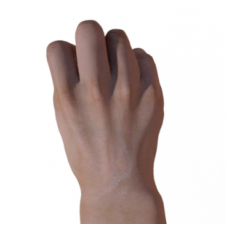

/tmp/rps/rock/rock01-039.png


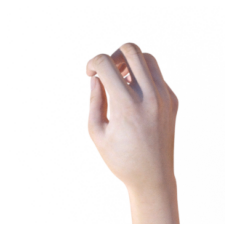

/tmp/rps/paper/paper07-003.png


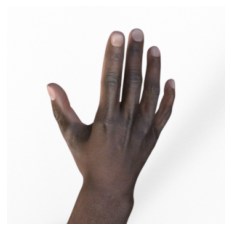

/tmp/rps/paper/paper03-007.png


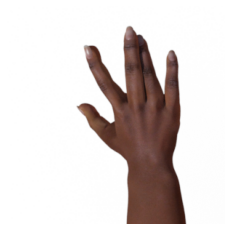

/tmp/rps/scissors/testscissors02-076.png


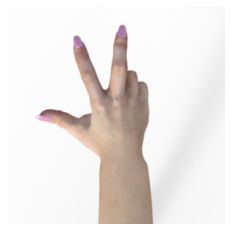

/tmp/rps/scissors/scissors01-028.png


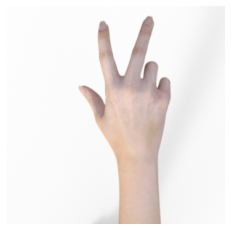

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# esta celda es para crear 
pic_index = 2

"""
For Looping Using List Comprehension
next_rock = []
for fname in rock_files[pic_index-2:pic_index]:
  # es lo mismo que poner "next_rock.append(rock_dir + "/" + fname))"
  next_rock.append(os.path.join(rock_dir, fname)) 

  
output: ['/tmp/rps/rock/rock04-029.png', '/tmp/rps/rock/rock01-039.png']
"""

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
print(next_rock)
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]
               
# aqui solo imprimimos cada imagen con su respectivo directorio, no era necesario colocar enumerate
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# 3 normalizacion y ampliacion de dataset 

# 4 creacion del modleo y compilacion 

# 5 entrenar el modelo 

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"

# aumentar el tamaño de la data 
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

#creamos el modelo
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


In [ ]:

#guardamos metricas del modelo entrnado en variables
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# 6 evaluacion del modelo 


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)